Course Human-Centered Data Science ([HCDS](https://www.mi.fu-berlin.de/en/inf/groups/hcc/teaching/winter_term_2020_21/course_human_centered_data_science.html)) - Winter Term 2020/21 - [HCC](https://www.mi.fu-berlin.de/en/inf/groups/hcc/index.html) | [Freie Universität Berlin](https://www.fu-berlin.de/)
***
# A2 - Reproducibility Workflow


Your assignment is to create a graph that looks a lot like the one below one, starting from scratch, and following best practices for reproducible research.

![wikipedia_pageViews_2008-2020.png](img/wikipedia_pageViews_2008-2020.png)

## Before you start
1. Read all instructions carefully before you begin.
1. Read all API documentation carefully before you begin.
1. Experiment with queries in the sandbox of the technical documentation for each API to familiarize yourself with the schema and the data.
1. Ask questions if you are unsure about anything!
1. When documenting your project, please keep the following questions in your mind:
   * _If I found this GitHub repository, and wanted to fully reproduce the analysis, what information would I want?_
   * _What information would I need?_

## Step 1️⃣: Data acquisition
In order to measure Wikipedia traffic from January 2008 until October 2020, you will need to collect data from two different APIs:

1. The **Legacy Pagecounts API** ([documentation](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Legacy_Pagecounts), [endpoint](https://wikimedia.org/api/rest_v1/#!/Pagecounts_data_(legacy)/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end)) provides access to desktop and mobile traffic data from December 2007 through July 2016.
1. The **Pageviews API** ([documentation](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews), [endpoint](https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end)) provides access to desktop, mobile web, and mobile app traffic data from July 2015 through last month.

For each API, you need to collect data for all months where data is available and then save the raw results into five (3+2) separate `JSON`files (one file per API query type) before continuing to step 2.

To get you started, you can use the following **sample code for API calls**:

In [1]:
# Source: https://public.paws.wmcloud.org/User:Jtmorgan/data512_a1_example.ipynb?format=raw

import json
import requests

endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

# SAMPLE parameters for getting aggregated legacy view data 
# see: https://wikimedia.org/api/rest_v1/#!/Legacy_data/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end
example_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2001010100",
                # for end use 1st day of month following final month of data
                 "end" : "2018100100"
                    }

# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
example_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2001010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2018101000'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/yuxin16',
    'From': 'xin.yu@fu-berlin.de'
}

def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

In [3]:
example_monthly_pageviews = api_call(endpoint_pageviews, example_params_pageviews)
example_monthly_pageviews

{'items': [{'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015070100',
   'views': 4376666686},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015080100',
   'views': 4332482183},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015090100',
   'views': 4485491704},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015100100',
   'views': 4477532755},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015110100',
   'views': 4287720220},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015120100',
   'views': 4100012037},
  {'project': 'en.wikipedia',
   'access': 

In [4]:
example_monthly_legacy = api_call(endpoint_legacy, example_params_legacy)
example_monthly_legacy

{'items': [{'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timestamp': '2007120100',
   'count': 2998331524},
  {'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timestamp': '2008010100',
   'count': 4930902570},
  {'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timestamp': '2008020100',
   'count': 4818393763},
  {'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timestamp': '2008030100',
   'count': 4955405809},
  {'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timestamp': '2008040100',
   'count': 5159162183},
  {'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timestamp': '2008050100',
   'count': 5584691092},
  {'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timest

In [5]:
#Data Collection  from API
# Legacy Pagecounts
pagecounts_desktop_param = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2001010100",
                 # for end use 1st day of month following final month of data
                 "end" : "2020100100"
                    }
pagecounts_mobile_param = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2001010100",
                 # for end use 1st day of month following final month of data
                 "end" : "2020100100"
                    }
# Pageviews
pageviews_desktop_param= {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2001010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2018101000'
                        }
pageviews_mobileweb_param = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2001010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2018101000'
                        }
pageviews_mobileapp_param = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2001010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2018101000'
                        }



In [13]:
# Store response into JSON File
pagecounts_desktop = api_call(endpoint_legacy, pagecounts_desktop_param)
pagecounts_mobile = api_call(endpoint_legacy, pagecounts_mobile_param)
pageviews_desktop = api_call(endpoint_pageviews, pageviews_desktop_param)
pageviews_mobileweb = api_call(endpoint_pageviews, pageviews_mobileweb_param)
pageviews_mobileapp = api_call(endpoint_pageviews, pageviews_mobileapp_param)

#pagecounts_desktop
#pagecounts_mobile
#pageviews_desktop
#pageviews_mobileweb
#pageviews_mobileapp


{'items': [{'project': 'en.wikipedia',
   'access-site': 'mobile-site',
   'granularity': 'monthly',
   'timestamp': '2014100100',
   'count': 3091546685},
  {'project': 'en.wikipedia',
   'access-site': 'mobile-site',
   'granularity': 'monthly',
   'timestamp': '2014110100',
   'count': 3027489668},
  {'project': 'en.wikipedia',
   'access-site': 'mobile-site',
   'granularity': 'monthly',
   'timestamp': '2014120100',
   'count': 3278950021},
  {'project': 'en.wikipedia',
   'access-site': 'mobile-site',
   'granularity': 'monthly',
   'timestamp': '2015010100',
   'count': 3485302091},
  {'project': 'en.wikipedia',
   'access-site': 'mobile-site',
   'granularity': 'monthly',
   'timestamp': '2015020100',
   'count': 3091534479},
  {'project': 'en.wikipedia',
   'access-site': 'mobile-site',
   'granularity': 'monthly',
   'timestamp': '2015030100',
   'count': 3330832588},
  {'project': 'en.wikipedia',
   'access-site': 'mobile-site',
   'granularity': 'monthly',
   'timestamp': '

In [7]:
#write into json File
#create a folder
import os
try:
    os.mkdir("raw_data")
    print('data directory created.')
except:
    pass


data directory created.


In [15]:
#create JSON File
"""
Source: 
https://docs.python.org/3/library/json.html;
Python Cookbook Chapter 6.2 
https://python3-cookbook.readthedocs.io/zh_CN/latest/c06/p02_read-write_json_data.html
https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
"""

def create_json_file(data,api,accesstype):
    startpoint = data["items"][0]["timestamp"][0:6]
    endpoint = data["items"][-1]["timestamp"][0:6]
    filename = api + "_"+accesstype + "_"+ startpoint + "_" + endpoint + ".json"
    
    with open(filename, "w") as f:
        json.dump(data, f)
    print(filename + " is written as JSON file.")


create_json_file(pagecounts_desktop,"pagecounts","desktop")
create_json_file(pagecounts_mobile,"pagecounts","mobile")
create_json_file(pageviews_desktop,"pageviews","desktop")
create_json_file(pageviews_mobileweb,"pageviews","mobileweb")
create_json_file(pageviews_mobileapp,"pageviews","mobileapp")



pagecounts_desktop_200712_201608.json is written as JSON file.
pagecounts_mobile_201410_201608.json is written as JSON file.
pageviews_desktop_201507_201809.json is written as JSON file.
pageviews_mobileweb_201507_201809.json is written as JSON file.
pageviews_mobileapp_201507_201809.json is written as JSON file.


Your `JSON`-formatted source data file must contain the complete and un-edited output of your API queries. The naming convention for the source data files is: `apiname_accesstype_firstmonth-lastmonth.json`. For example, your filename for monthly page views on desktop should be: `pagecounts_desktop-site_200712-202010.json`

### Important notes❗
1. As much as possible, we're interested in *organic* (user) traffic, as opposed to traffic by web crawlers or spiders. The Pageview API (but not the Pagecount API) allows you to filter by `agent=user`. You should do that.
1. There is about one year of overlapping traffic data between the two APIs. You need to gather, and later graph, data from both APIs for this period of time.

## Step 2: Data processing

You will need to perform a series of processing steps on these data files in order to prepare them for analysis. These steps must be followed exactly in order to prepare the data for analysis. At the end of this step, you will have a single `CSV`-formatted data file `en-wikipedia_traffic_200712-202010.csv` that can be used in your analysis (step 3) with no significant additional processing.

* For data collected from the Pageviews API, combine the monthly values for `mobile-app` and `mobile-web` to create a total mobile traffic count for each month.
* For all data, separate the value of `timestamp` into four-digit year (`YYYY`) and two-digit month (`MM`) and discard values for day and hour (`DDHH`).

Combine all data into a single CSV file with the following headers:

| year | month |pagecount_all_views|pagecount_desktop_views|pagecount_mobile_views|pageview_all_views|pageview_desktop_views|pageview_mobile_views|
|------| ------|-------------------|-----------------------|----------------------|------------------|----------------------|---------------------|
| YYYY | MM    |num_views          |num_views              |num_views             |num_views         |num_views             |num_views            | 

In [44]:
# combine mobile traffic for pageviews API

"""
Source:
https://datatofish.com/load-json-pandas-dataframe/
"""
import pandas as pd
with open('pageviews_mobileweb_201507_201809.json') as f:
    pageviews_mobileweb = json.load(f)
df_pageviews_mobileweb = pd.json_normalize(pageviews_mobileweb,["items"])
df_pageviews_mobileweb

with open('pageviews_mobileweb_201507_201809.json') as f:
    pageviews_mobileweb = json.load(f)
df_pageviews_mobileweb = pd.json_normalize(pageviews_mobileweb,["items"])
df_pageviews_mobileweb["year"]=df_pageviews_mobileweb["timestamp"].str[0:4]
df_pageviews_mobileweb["month"]=df_pageviews_mobileweb["timestamp"].str[4:6]
df_pageviews_mobileweb = df_pageviews_mobileweb.loc[:, ['year','month','access','views']]
df_pageviews_mobileweb




#pd.json_normalize(r'pageviews_mobileweb_201507_201809.json')
# pageviews_mobileweb = pd.read_json (r'pageviews_mobileweb_201507_201809.json',orient='values')
# pageviews_mobileweb
# for row in pageviews_mobileweb.iterrows():
#         print (row[1],row[3],row[4])





,year,month,access,views
0,2015,07,mobile-web,3179131148
1,2015,08,mobile-web,3192663889
2,2015,09,mobile-web,3073981649
3,2015,10,mobile-web,3173975355
4,2015,11,mobile-web,3142247145
5,2015,12,mobile-web,3276836351
6,2016,01,mobile-web,3611404079
7,2016,02,mobile-web,3242448142
8,2016,03,mobile-web,3288785117
9,2016,04,mobile-web,3177044999


In [45]:
with open('pageviews_mobileapp_201507_201809.json') as f:
    pageviews_mobileapp = json.load(f)
df_pageviews_mobileapp = pd.json_normalize(pageviews_mobileapp,["items"])
df_pageviews_mobileapp

with open('pageviews_mobileapp_201507_201809.json') as f:
    pageviews_mobileapp = json.load(f)
df_pageviews_mobileapp = pd.json_normalize(pageviews_mobileapp,["items"])
df_pageviews_mobileapp["year"]=df_pageviews_mobileapp["timestamp"].str[0:4]
df_pageviews_mobileapp["month"]=df_pageviews_mobileapp["timestamp"].str[4:6]
df_pageviews_mobileapp = df_pageviews_mobileapp.loc[:, ['year','month','access','views']]
df_pageviews_mobileapp

,year,month,access,views
0,2015,07,mobile-app,109624146
1,2015,08,mobile-app,109669149
2,2015,09,mobile-app,96221684
3,2015,10,mobile-app,94523777
4,2015,11,mobile-app,94353925
5,2015,12,mobile-app,99438956
6,2016,01,mobile-app,106432767
7,2016,02,mobile-app,92414130
8,2016,03,mobile-app,97899074
9,2016,04,mobile-app,81719003


In [56]:
#Combine mobile APP and Mobile Web and convert into monthly view
monthly_pageviews = pd.merge(df_pageviews_mobileapp, df_pageviews_mobileweb, how='outer', on=["year","month"])
monthly_pageviews["pageview_mobile_views"]=monthly_pageviews["views_x"]+monthly_pageviews["views_y"]
monthly_pageviews=monthly_pageviews.loc[:, ['year','month','pageview_mobile_views']]
monthly_pageviews



,year,month,pageview_mobile_views
0,2015,07,3288755294
1,2015,08,3302333038
2,2015,09,3170203333
3,2015,10,3268499132
4,2015,11,3236601070
5,2015,12,3376275307
6,2016,01,3717836846
7,2016,02,3334862272
8,2016,03,3386684191
9,2016,04,3258764002


In [65]:
#create DataFrame for remaining json files
#df_pageviews_desktop
with open('pageviews_desktop_201507_201809.json') as f:
    pageviews_desktop = json.load(f)
df_pageviews_desktop = pd.json_normalize(pageviews_desktop,["items"])
df_pageviews_desktop

with open('pageviews_desktop_201507_201809.json') as f:
    pageviews_desktop = json.load(f)
df_pageviews_desktop = pd.json_normalize(pageviews_desktop,["items"])
df_pageviews_desktop["year"]=df_pageviews_desktop["timestamp"].str[0:4]
df_pageviews_desktop["month"]=df_pageviews_desktop["timestamp"].str[4:6]
df_pageviews_desktop["pageview_desktop_views"] = df_pageviews_desktop["views"]
df_pageviews_desktop = df_pageviews_desktop.loc[:, ['year','month','pageview_desktop_views']]
df_pageviews_desktop

# df pagecounts_desktop
with open('pagecounts_desktop_200712_201608.json') as f:
    pagecounts_desktop = json.load(f)
df_pagecounts_desktop = pd.json_normalize(pagecounts_desktop,["items"])

with open('pagecounts_desktop_200712_201608.json') as f:
    pagecounts_desktop = json.load(f)
df_pagecounts_desktop = pd.json_normalize(pagecounts_desktop,["items"])
df_pagecounts_desktop["year"]=df_pagecounts_desktop["timestamp"].str[0:4]
df_pagecounts_desktop["month"]=df_pagecounts_desktop["timestamp"].str[4:6]
df_pagecounts_desktop["pagecount_desktop_views"] = df_pagecounts_desktop["count"]
df_pagecounts_desktop = df_pagecounts_desktop.loc[:, ['year','month','pagecount_desktop_views']]
df_pagecounts_desktop

# pagecounts_mobile_201410_201608.json is written as JSON file.
with open('pagecounts_mobile_201410_201608.json') as f:
    pagecounts_mobile = json.load(f)
df_pagecounts_mobile = pd.json_normalize(pagecounts_mobile,["items"])

with open('pagecounts_mobile_201410_201608.json') as f:
    pagecounts_mobile = json.load(f)
df_pagecounts_mobile = pd.json_normalize(pagecounts_mobile,["items"])
df_pagecounts_mobile["year"]=df_pagecounts_mobile["timestamp"].str[0:4]
df_pagecounts_mobile["month"]=df_pagecounts_mobile["timestamp"].str[4:6]
df_pagecounts_mobile["pagecount_mobile_views"] = df_pagecounts_mobile["count"]
df_pagecounts_mobile = df_pagecounts_mobile.loc[:, ['year','month','pagecount_mobile_views']]
df_pagecounts_mobile

,year,month,pagecount_mobile_views
0,2014,10,3091546685
1,2014,11,3027489668
2,2014,12,3278950021
3,2015,01,3485302091
4,2015,02,3091534479
5,2015,03,3330832588
6,2015,04,3222089917
7,2015,05,3334069483
8,2015,06,3038162463
9,2015,07,3254472695


In [83]:
#Generate summary of API traffic of different access types
summary_pagecount=pd.merge(df_pagecounts_desktop, df_pagecounts_mobile,how='outer', on=["year","month"])
summary_pagecount

summary_pageview=pd.merge(df_pageviews_desktop, monthly_pageviews,how='outer', on=["year","month"])
summary_pageview

summary=pd.merge(summary_pagecount, summary_pageview ,how='outer', on=["year","month"])
summary

summary["pagecount_all_views"]=summary["pagecount_desktop_views"]+summary["pagecount_mobile_views"]
summary["pageview_all_views"]=summary["pageview_desktop_views"]+summary["pageview_mobile_views"]
cols = ["year","month","pagecount_all_views","pagecount_desktop_views","pagecount_mobile_views","pageview_all_views","pageview_desktop_views","pageview_mobile_views"]
#summary=summary[cols]
summary=summary.fillna(0)[cols]
summary
summary.to_csv('en_wikipedia_traffic.csv')

## Step 3: Analysis

For this assignment, the "analysis" will be fairly straightforward: you will visualize the dataset you have created as a **time series graph**. Your visualization will track three traffic metrics: mobile traffic, desktop traffic, and all traffic (mobile + desktop). In order to complete the analysis correctly and receive full credit, your graph will need to be the right scale to view the data; all units, axes, and values should be clearly labeled; and the graph should possess a legend and a title. You must also generate a .png or .jpeg formatted image of your final graph.
Please graph the data in your notebook, rather than using an external application!

In [100]:
summary
#since three metrics should be plotted, therefore, the summary dataframe need to be modified 
df_summary=summary
df_summary["mobile traffic"]=(df_summary["pagecount_mobile_views"]+df_summary["pageview_mobile_views"])/1000000000
df_summary["desktop traffic"]=(df_summary["pagecount_desktop_views"]+df_summary["pageview_desktop_views"])/1000000000
df_summary["all traffic"]=df_summary["mobile traffic"]+df_summary["desktop traffic"]
df_summary = df_summary.loc[:,["year","month","desktop traffic","mobile traffic","all traffic"]]
df_summary

,year,month,desktop traffic,mobile traffic,all traffic
0,2007,12,2.998332,0.000000,2.998332
1,2008,01,4.930903,0.000000,4.930903
2,2008,02,4.818394,0.000000,4.818394
3,2008,03,4.955406,0.000000,4.955406
4,2008,04,5.159162,0.000000,5.159162
...,...,...,...,...,...
125,2018,05,3.675652,4.089189,7.764841
126,2018,06,3.278649,3.977767,7.256416
127,2018,07,3.457052,4.266114,7.723165
128,2018,08,3.399131,4.187362,7.586493


<Figure size 3600x1440 with 0 Axes>

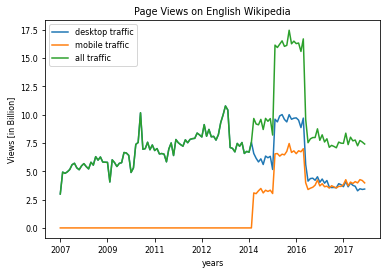

In [123]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,20))
plt.rcParams.update({'font.size': 8})
traffic_visualization = df_summary.plot(x="year",title="Page Views on English Wikipedia", legend = True)
traffic_visualization.set_ylabel('Views [in Billion]',fontdict={'fontsize':8})
traffic_visualization.set_xlabel('years',fontdict={'fontsize':8})
traffic_visualization

plt.savefig('Page Views on English Wikipedia.png', dpi=200);

# plt.figure(figsize=(50,15))
# plt.plot(df_summary['year'], df_summary['desktop traffic'] , color="blue")
# plt.plot(df_summary['year'], df_summary['mobile traffic'] , color="red")
# plt.plot(df_summary['year'], df_summary['all traffic'] , color="black")
# plt.legend(["desktop traffic", "mobile traffic","all traffic"])
# plt.title("Page Views on English Wikipedia")

# plt.show()

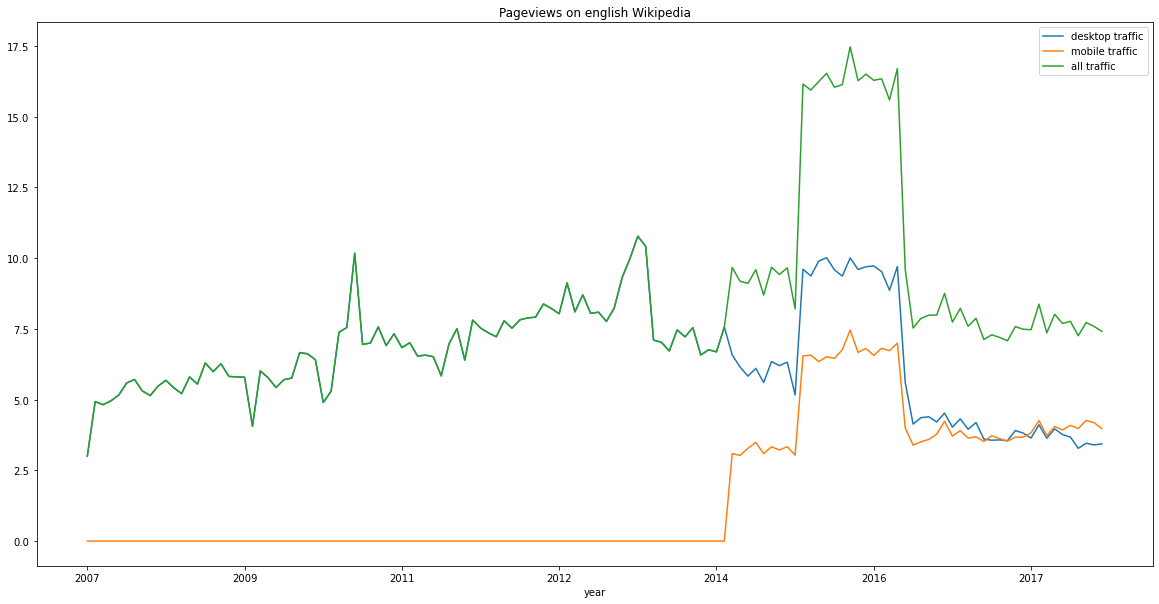

***

#### Credits

This exercise is slighty adapted from the course [Human Centered Data Science (Fall 2019)](https://wiki.communitydata.science/Human_Centered_Data_Science_(Fall_2019)) of [Univeristy of Washington](https://www.washington.edu/datasciencemasters/) by [Jonathan T. Morgan](https://wiki.communitydata.science/User:Jtmorgan).

Same as the original inventors, we release the notebooks under the [Creative Commons Attribution license (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/).